># Forecasting Monthly Revenue Expenditure By Government Of Bihar Using SARIMA Model, & Establishing Grangler Causality Between Revenue Deficit/Surpulus & Revenue Expenditure.. 
>>##### By - Saif Ali Ahmad
Discription about dataset - This time series data set is compiled by CAG (Comptroller and Auditor General of India). It is available on EPWRF (Economic & Political Weekly Research Foundation) website under Finances of State Governments,State Government Receipts and Expenditure (CAG Monthly Data) section.<br><br>
    Dataset Details : There are 179 rows representing Monthly Revenue Expenditure and Monthly Revenue Deficits/Surplus, starting from 1st April,2008 to 1st February,2023 .<br><br> 
    
>URL for data set - https://epwrfits.in/TypesOfStateFinancesOfGovernment.aspx#

In [1]:
# Importing important libraries
import pandas as pd 
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# setting the default size for plots
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

In [3]:
# Suppressing the Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# setting the working directory
os.chdir("D:\Time Series Analysis")
os.getcwd()

'D:\\Time Series Analysis'

In [5]:
# importing the data set
revenue_exp = pd.read_excel(io = 'State Revenue Expenditure.xlsx',sheet_name='Revenue Expenditure Of States')

# printing the shape of imported data set
print('\nShape Of Revenue Expenditure Data : ',revenue_exp.shape,'\n')

# displaying the imported dataset
revenue_exp.head()


Shape Of Revenue Expenditure Data :  (179, 29) 



,Month,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,2008-04-01,2330,118,612.0,497,483,2681,780,117,NaN,...,550.0,842.0,2179.0,148.0,3413.0,NaN,216.0,3342.0,476.0,1704.0
1,2008-05-01,2473,109,252.0,891,1013,2812,1420,701,NaN,...,956.0,1405.0,2359.0,126.0,2547.0,NaN,218.0,6483.0,534.0,1952.0
2,2008-06-01,4010,135,678.0,1975,1032,2181,1213,644,NaN,...,1269.0,2062.0,2191.0,94.0,4171.0,NaN,186.0,5351.0,636.0,2661.0
3,2008-07-01,4239,120,1034.0,1060,827,2980,1855,822,NaN,...,1419.0,2519.0,2033.0,393.0,3196.0,NaN,239.0,6355.0,609.0,2608.0
4,2008-08-01,4288,140,872.0,990,901,3048,1517,613,NaN,...,1345.0,1609.0,2298.0,102.0,3113.0,NaN,204.0,4525.0,564.0,2485.0


In [6]:
# columns present in the dataset
revenue_exp.columns

Index(['Month', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [7]:
# setting Month column as index
revenue_exp.set_index(keys=['Month'],drop=True,inplace=True)

# displaying the dataset with Month as an index
revenue_exp.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Month,,,,,,,,,,,,,,,,,,,,,
2008-04-01,2330,118,612.0,497,483,2681,780,117,NaN,74.0,...,550.0,842.0,2179.0,148.0,3413.0,NaN,216.0,3342.0,476.0,1704.0
2008-05-01,2473,109,252.0,891,1013,2812,1420,701,NaN,498.0,...,956.0,1405.0,2359.0,126.0,2547.0,NaN,218.0,6483.0,534.0,1952.0
2008-06-01,4010,135,678.0,1975,1032,2181,1213,644,NaN,959.0,...,1269.0,2062.0,2191.0,94.0,4171.0,NaN,186.0,5351.0,636.0,2661.0
2008-07-01,4239,120,1034.0,1060,827,2980,1855,822,NaN,752.0,...,1419.0,2519.0,2033.0,393.0,3196.0,NaN,239.0,6355.0,609.0,2608.0
2008-08-01,4288,140,872.0,990,901,3048,1517,613,NaN,554.0,...,1345.0,1609.0,2298.0,102.0,3113.0,NaN,204.0,4525.0,564.0,2485.0


In [8]:
# Extracting data of Bihar's Revenue Expenditure
revenue_expediture_Bihar = revenue_exp.loc[:,['Bihar']]

#printing the shape of dataset
print("\nShape Of Bihar's Revenue Expenditure Data : ",revenue_exp.shape,'\n')

# displaying the Bihar revenue expenditure dataset
revenue_expediture_Bihar


Shape Of Bihar's Revenue Expenditure Data :  (179, 28) 



,Bihar
Month,
2008-04-01,497
2008-05-01,891
2008-06-01,1975
2008-07-01,1060
2008-08-01,990
...,...
2022-10-01,12936
2022-11-01,15860
2022-12-01,17919


In [9]:
# Basic discription of Bihar's revenue expenditure dataset
revenue_expediture_Bihar.describe().T

,count,mean,std,min,25%,50%,75%,max
Bihar,179.0,7254.206704,6001.285736,497.0,3171.5,5613.0,9814.0,35868.0


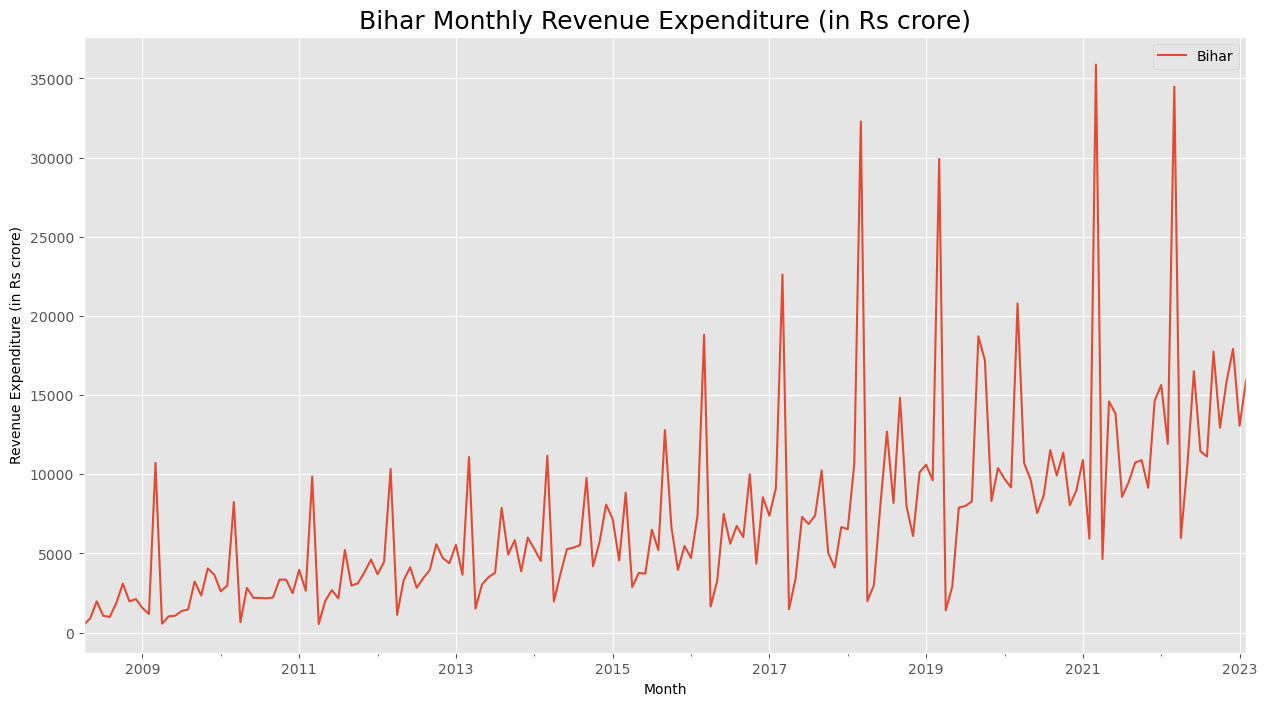

In [10]:
# Creating plot for Bihar's Revenue Expenditure
revenue_expediture_Bihar.plot()
plt.title('Bihar Monthly Revenue Expenditure (in Rs crore)',fontsize=18)
plt.ylabel('Revenue Expenditure (in Rs crore)')
plt.show()

 > #### We can observe in the above plot that this Time Series data is not Stationary. <br> Its Mean and Variance is Increasing with time. 

# Stabilizing the Variance in the Dataset:
> We are using the Box-Cox transformation to satbilized the variance present in the dataset.

In [11]:
# importing Box-Cox transformation
from scipy.stats import boxcox
# importing inverse Box-Cox transformation
from scipy.special import inv_boxcox

In [12]:
# Converting pandas dataframe into numpy 1-D array for feeding into Box-Cox function
revenue_exp_Bihar_1d_array = np.array(revenue_expediture_Bihar.Bihar)

In [13]:
# Applying Box-Cox transformation on the data and finding optimal Lambda value
revenue_expediture_Bihar['Bihar_BoxCox'] , optimal_lambda = boxcox(revenue_exp_Bihar_1d_array)

In [14]:
# Printing Optimal Lambda vaue and transformed data
print('\n Optimal Lambda Value for Box-Cox Transformation : ',optimal_lambda,'\n')
revenue_expediture_Bihar


 Optimal Lambda Value for Box-Cox Transformation :  0.17083024166962077 



,Bihar,Bihar_BoxCox
Month,,
2008-04-01,497,11.052765
2008-05-01,891,12.825663
2008-06-01,1975,15.546432
2008-07-01,1060,13.388181
2008-08-01,990,13.164914
...,...,...
2022-10-01,12936,23.648478
2022-11-01,15860,24.693622
2022-12-01,17919,25.337276


In [15]:
# Isolating Box-Cox transformed column for Analyis
revenue_exp_Bihar = revenue_expediture_Bihar.loc[:,['Bihar_BoxCox']]
revenue_exp_Bihar

,Bihar_BoxCox
Month,
2008-04-01,11.052765
2008-05-01,12.825663
2008-06-01,15.546432
2008-07-01,13.388181
2008-08-01,13.164914
...,...
2022-10-01,23.648478
2022-11-01,24.693622
2022-12-01,25.337276


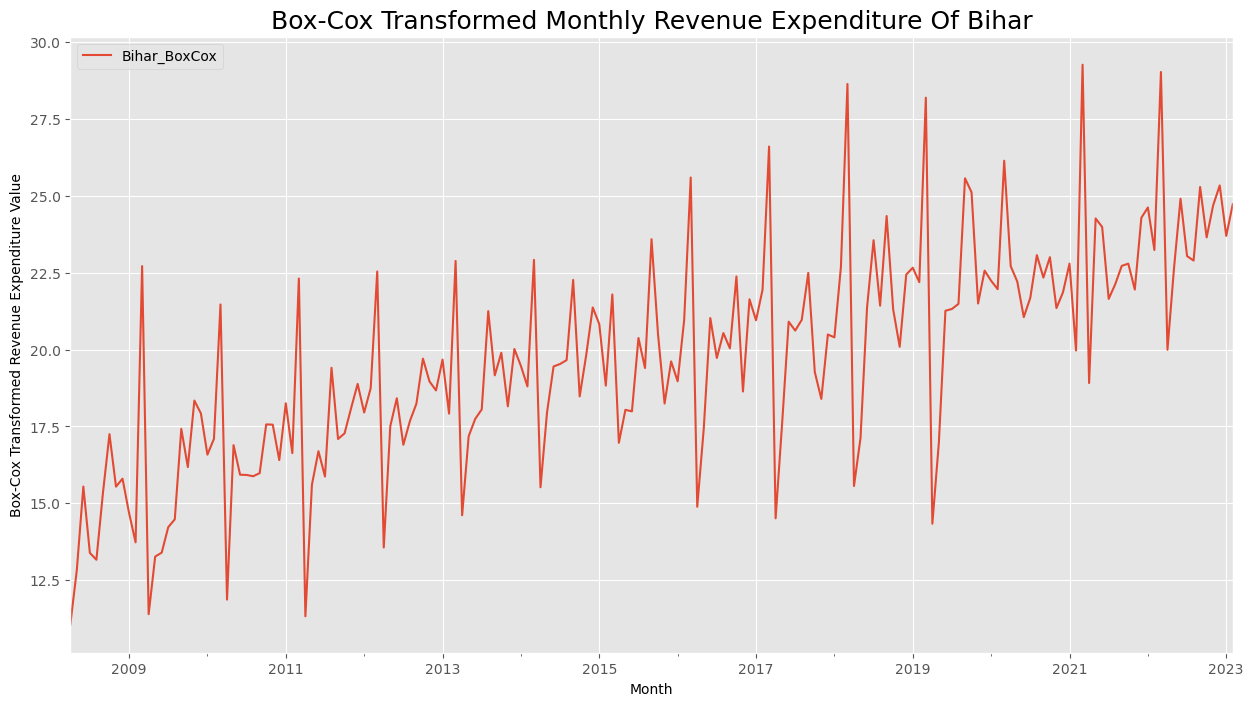

In [16]:
# Plotting Box-Cox transformed data
revenue_exp_Bihar.plot()
plt.title('Box-Cox Transformed Monthly Revenue Expenditure Of Bihar',fontsize = 18)
plt.ylabel('Box-Cox Transformed Revenue Expenditure Value')
plt.show()

> #### After Box-Cox tranformation we can observe in the above plot that the Variance in the time series is now stabilized.

# Time Series Modelling

In [17]:
# Importing Augumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# Importing ACF and PACF plotting functions
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Importing Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
# Creating function for showing adfuller test results in report format
def adf_test_report(adf):
    adf = adfuller(adf)
    print('Test Statistic        = ',adf[0])
    print('Critical value at 5%  = ',adf[4]['5%'])
    print('P-Value               = ',adf[1])
    print('\nResult :')
    if adf[1] < 0.05:
        print('\nTime Series is Stationary\n')
    else:
        print('\nTime Series is Not Stationary\n')

In [19]:
# # Augumented Dickey-Fuller test on revenue_exp_Bihar time series
adf_test_report(revenue_exp_Bihar)

Test Statistic        =  -0.5026156220384324
Critical value at 5%  =  -2.8790075987120027
P-Value               =  0.8915050639445872

Result :

Time Series is Not Stationary



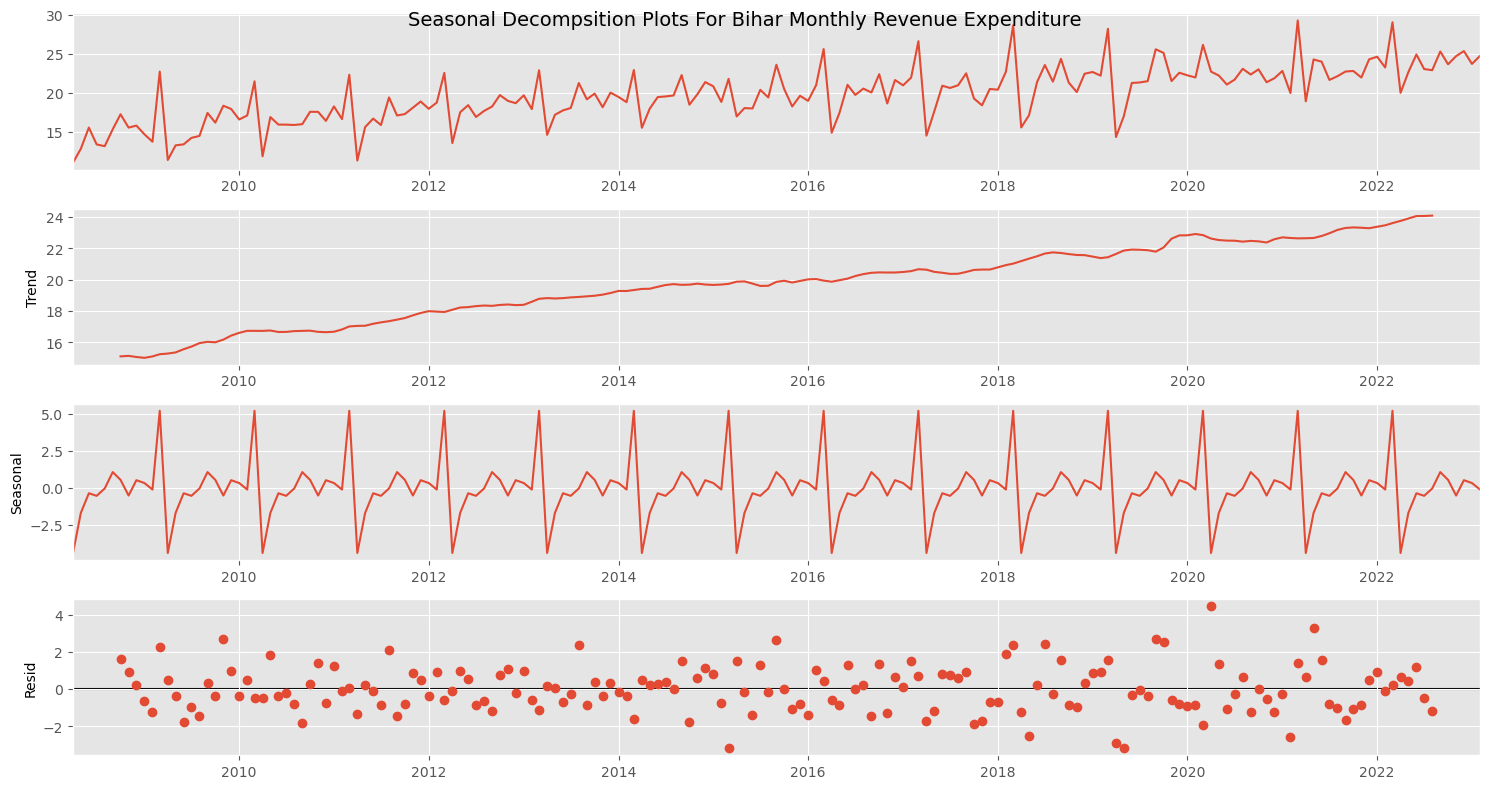

In [20]:
decomposed_plot = seasonal_decompose(revenue_exp_Bihar,period=12)
decomposed_plot.plot()
plt.suptitle('Seasonal Decompsition Plots For Bihar Monthly Revenue Expenditure',fontsize=14)
plt.show()

> The Sesonal Decompose graph shows that the given data has both the Trend and Seasonality component present.<br> In the next section we will find the Seasonal Period present in this timeseries

## Finding the number of time steps for a single seasonal period.
> To find the number of time steps for a single seasonal period we will substract rolling mean from orignal timeseries data.<br> The window size of the Rolling Mean should be greater than the expected seasonal period.<br> Here we expect that this timeseries has seasonal period of 12, so we will take window size of any number above 12. <br>

In [21]:
# Subtracting rolling mean of window size 20 from given time series
seasonal_detrend = revenue_exp_Bihar - revenue_exp_Bihar.rolling(window=20).mean()
# drpping na values
seasonal_detrend = seasonal_detrend.dropna()
seasonal_detrend

,Bihar_BoxCox
Month,
2009-11-01,3.355059
2009-12-01,2.593517
2010-01-01,1.063768
2010-02-01,1.501067
2010-03-01,5.465822
...,...
2022-10-01,0.085790
2022-11-01,1.359412
2022-12-01,1.681802


In [22]:
# Augumented Dickey-Fuller test on seasonal_detrend time series
adf_test_report(seasonal_detrend)

Test Statistic        =  -3.5482506593104697
Critical value at 5%  =  -2.881274703275226
P-Value               =  0.006831014134248472

Result :

Time Series is Stationary



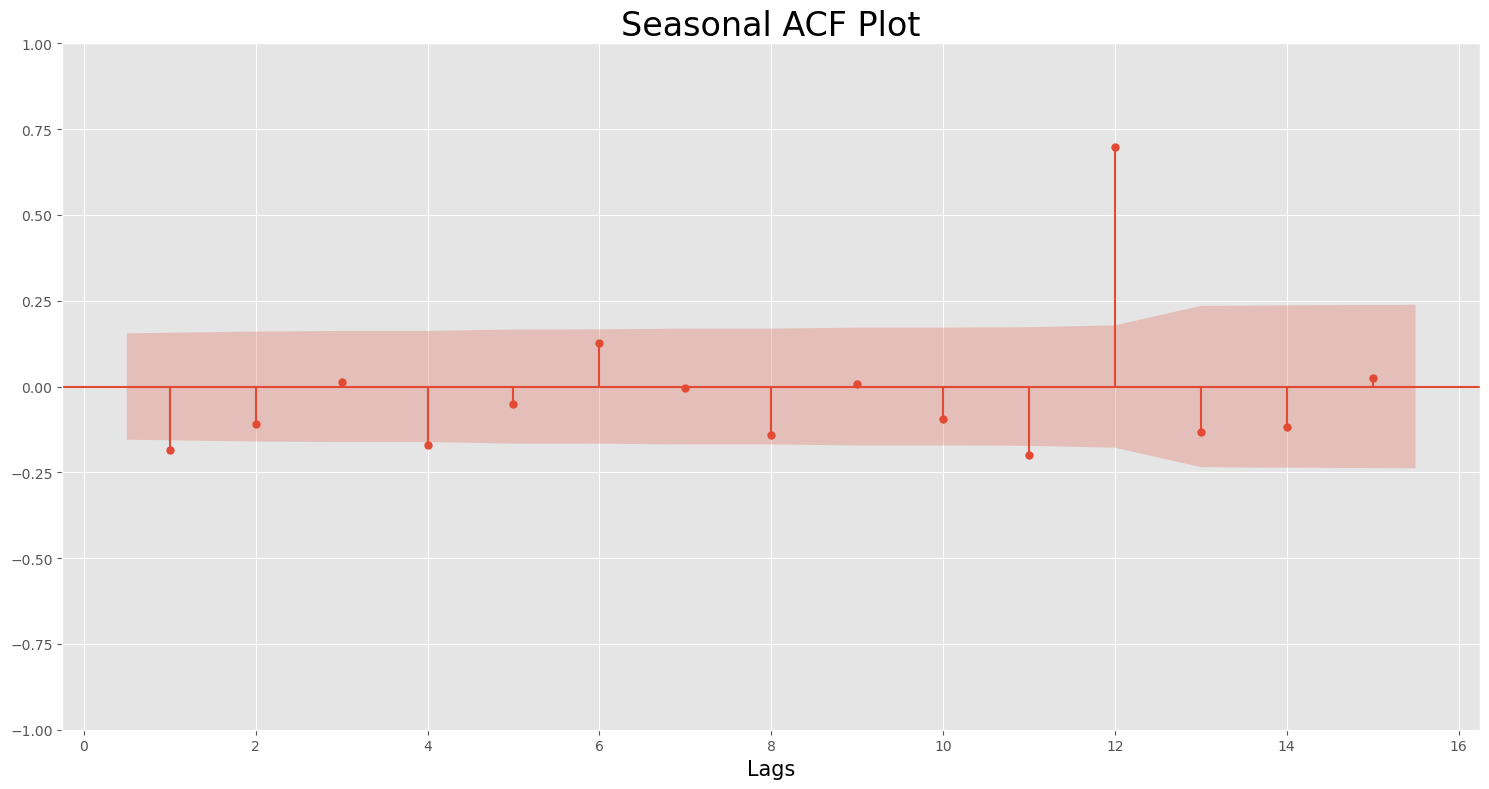

In [23]:
plot_acf(seasonal_detrend,lags=15, zero= False)
plt.title('Seasonal ACF Plot',fontsize=24)
plt.xlabel('Lags',fontsize=15)
plt.tight_layout()

#### Periodicity of Time series:<br>
>Seasonal ACF Plot shows spike at 12th Lag, which indicates the presence of periodicity, i.e. the number of periods in season. Here in this time series periodicity is 12

## Detrending the Timeseries

> As both the Trend and Seasonal Components are present in the data:<br> To remove Trend we take differencing of 1.<br> And, for removing Seasonal effect we take difference of 12 (i.e. the Seasonal Period).

In [24]:
# Detrending the data
detrended_data  = revenue_exp_Bihar.diff().diff(12).dropna()
detrended_data

,Bihar_BoxCox
Month,
2009-05-01,0.099926
2009-06-01,-2.591847
2009-07-01,2.985846
2009-08-01,0.477619
2009-09-01,0.771979
...,...
2022-10-01,-1.711123
2022-11-01,1.886503
2022-12-01,-1.688849


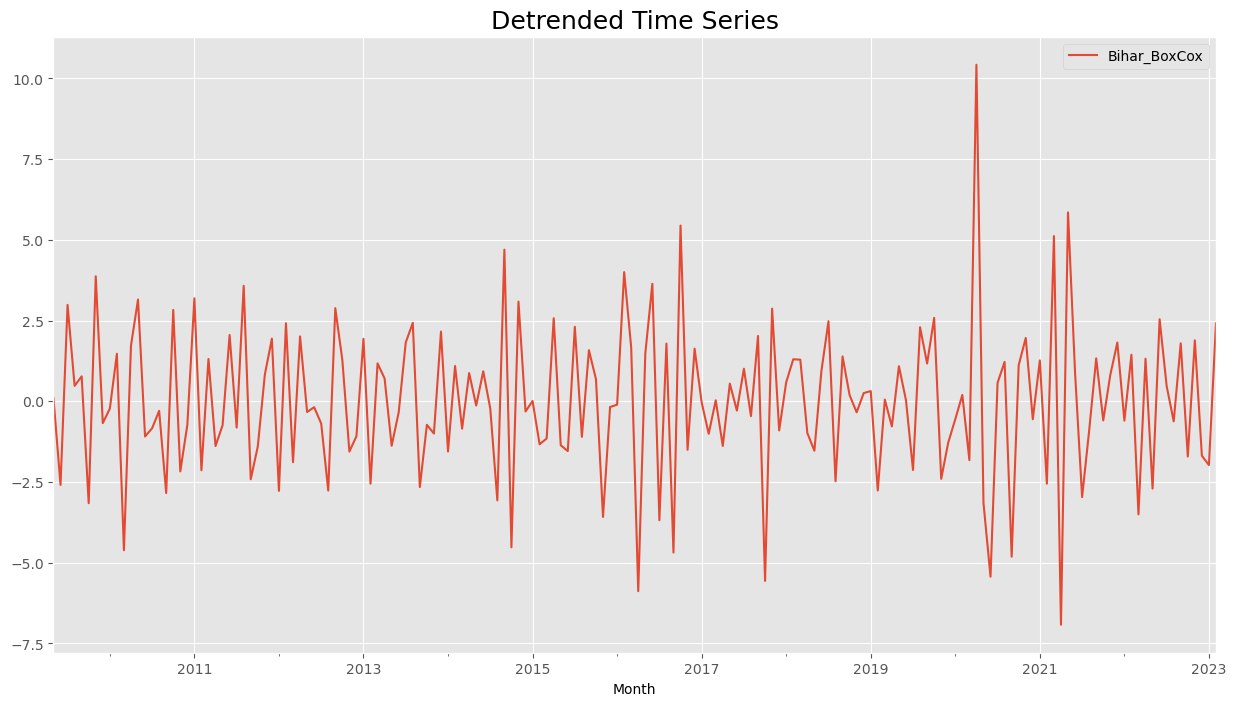

In [25]:
# Plotting detrended timeseries
detrended_data.plot()
plt.title('Detrended Time Series',fontsize=18)
plt.show()

In [26]:
# Augumented Dickey-Fuller test on detrended time series
adf_test_report(detrended_data)

Test Statistic        =  -5.72186129605833
Critical value at 5%  =  -2.880749791423677
P-Value               =  6.911807143560984e-07

Result :

Time Series is Stationary



## Finding Seasonal and Trend Orders of the Model

> ### Plotting ACF and PACF at Seasonal Lags to find:
<br> P: Seasonal autoregressive order.<br>
D: Seasonal difference order.<br>
Q: Seasonal moving average order.<br>

In [27]:
seasonal_lags = [12,24,36,48,60,72]

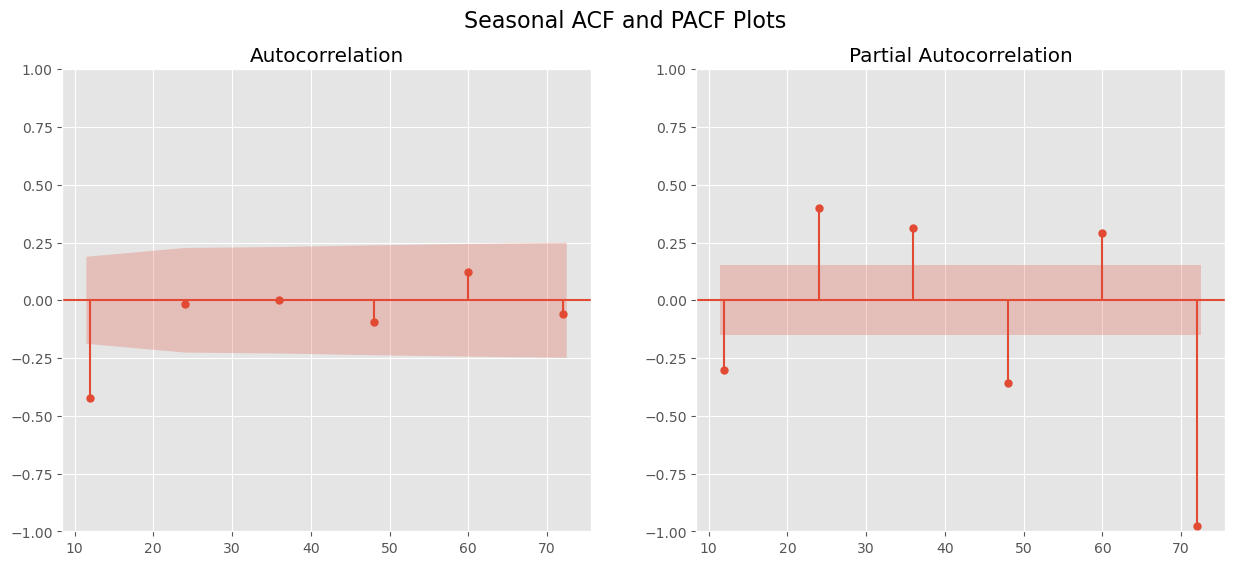

In [28]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plot_acf(x=detrended_data,lags=seasonal_lags,zero=False,ax =ax1)
plot_pacf(x=detrended_data,lags=seasonal_lags,zero=False,ax =ax2)
plt.suptitle('Seasonal ACF and PACF Plots',fontsize=16)
plt.show()

#### Seasonal Order of Time series:<br>
> After Examining Seasonal ACF and PACF we conculude:<br>As ACF cuts off after 1st Lag and PACF Oscillates Sinusoidally, the given time series is MA(1) model.<br>Final Seasonal Order of SARIMA Model is : (P,D,Q,M) = (0,1,1,12)

> ### Plotting ACF and PACF to find:
<br> p: Trend autoregression order.<br>
d: Trend difference order.<br>
q: Trend moving average order.<br>

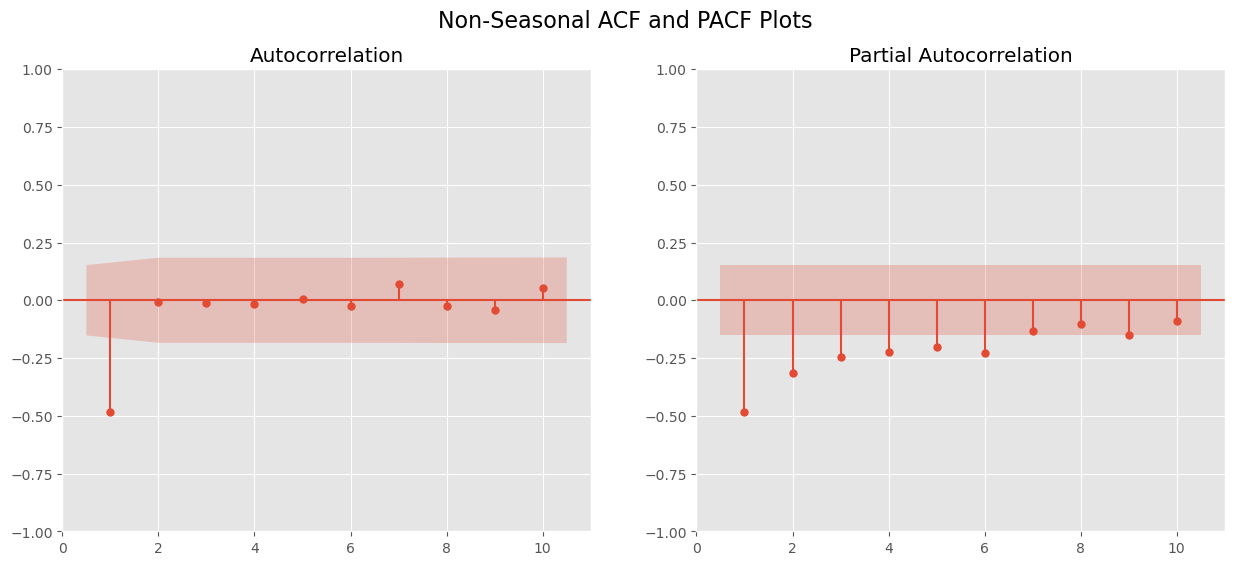

In [29]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plot_acf(x=detrended_data,lags=10,zero=False,ax =ax1)
plot_pacf(x=detrended_data,lags=10,zero=False,ax =ax2)
plt.suptitle('Non-Seasonal ACF and PACF Plots',fontsize=16)
plt.show()

#### Non-Seasonal Order of Time series:<br>
> After Examining Non-Seasonal ACF and PACF we conculude:<br>As ACF cuts off after 1st Lag and PACF Oscillates Sinusoidally, the given time series is MA(1) model.<br>Final Non-Seasonal Order of SARIMA Model is : (p,d,q) = (0,1,1)

## SARIMA Modelling

> From above analysis we know the orders of SARIMA Model:<br> (p,d,q) Non-Seasonal order  = (0,1,1)<br>(P,D,Q,M) Seasonal Order = (0,1,1,12)

In [30]:
# Importing the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
# Suppressing the Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [32]:
# Creating a SARIMA model
sarima_model = SARIMAX(endog=revenue_exp_Bihar,order=(0,1,1),seasonal_order=(0,1,1,12))

In [33]:
# Fit the model
sarima_model = sarima_model.fit()

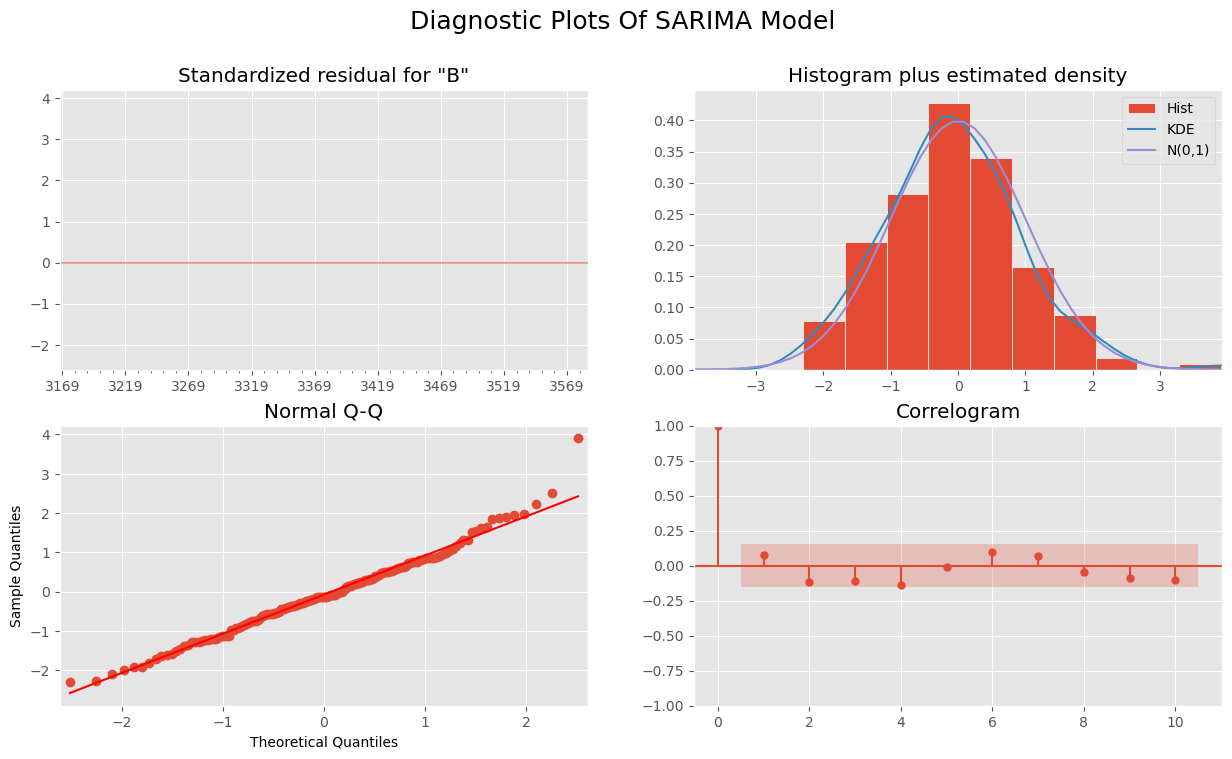

In [34]:
# Plotting the Diagnostic Plots
sarima_model.plot_diagnostics()
plt.suptitle('Diagnostic Plots Of SARIMA Model',fontsize=18)
plt.show()

In [35]:
# Print the Model summary
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Bihar_BoxCox   No. Observations:                  179
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -300.448
Date:                            Thu, 01 Jun 2023   AIC                            606.897
Time:                                    19:42:29   BIC                            616.233
Sample:                                04-01-2008   HQIC                           610.686
                                     - 02-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9634      0.031    -30.821      0.000      -1.025      -0.902
ma.S.L12      -0.8611      0.059   

> #### Model Summary shows:<br><br>In Ljung-Box test Null Hyposthesis is accepted, showing no correlations in residuals.<br><br>However in case of Jarqua-Bera test, Null Hypothesis is rejected, pointing towards Non-Normal distribution of Residuals.But looking at Q-Q plots in the Diagnostic Plots, we can infer in this case the JB value was thrown off by few outlying points in the time series, so we can proceed for further model building.

> ## Predicting Monthly Revenue Expenditure of Last 12 months

In [36]:
# Finding Predicted Means of SARIMA Model
sarima_pred = sarima_model.get_prediction(start=-12,dynamic=False)
sarima_mean = sarima_pred.predicted_mean

In [37]:
# Converting Box-Cox transformed predicted mean in orignal scale
sarima_mean = inv_boxcox(sarima_mean,optimal_lambda)
sarima_mean

2022-03-01    33448.896525
2022-04-01     5035.643177
2022-05-01     9053.287891
2022-06-01    12322.140813
2022-07-01    12105.163211
2022-08-01    13186.104804
2022-09-01    16643.006619
2022-10-01    15016.466036
2022-11-01    11528.075763
2022-12-01    15261.970559
2023-01-01    15297.066918
2023-02-01    13764.078066
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
# Finding Confidence Interval of predictions by SARIMA Model
sarima_conf_int = sarima_pred.conf_int()
sarima_conf_int.head()

,lower Bihar_BoxCox,upper Bihar_BoxCox
2022-03-01,26.112342,31.581249
2022-04-01,16.523527,21.990271
2022-05-01,19.170328,24.636770
2022-06-01,20.671392,26.137553
2022-07-01,20.582860,26.048762


In [39]:
# Getting lower and Upper confidence interval for Predicted Mean
sarima_conf_int_lower = sarima_conf_int['lower Bihar_BoxCox']
sarima_conf_int_upper = sarima_conf_int['upper Bihar_BoxCox']

In [40]:
# Converting Box-Cox transformed Upper & Lower Confidence Interval of predicted mean in orignal scale
sarima_conf_int_lower = inv_boxcox(sarima_conf_int_lower,optimal_lambda)
sarima_conf_int_upper = inv_boxcox(sarima_conf_int_upper,optimal_lambda)

In [41]:
# Datetime index of revenue_exp_bihar
dates = revenue_exp_Bihar.index
dates

DatetimeIndex(['2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01',
               '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01',
               '2008-12-01', '2009-01-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Month', length=179, freq=None)

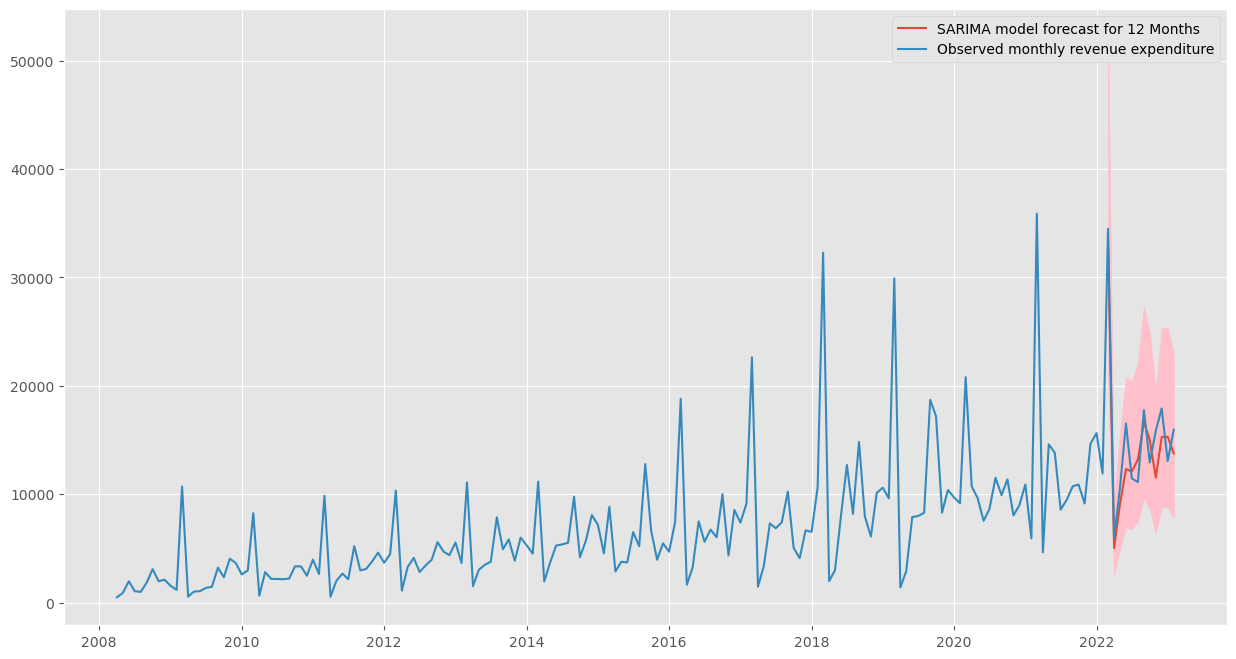

In [42]:
# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates[-12:], sarima_mean, label='SARIMA model forecast for 12 Months')
plt.fill_between(sarima_conf_int.index, sarima_conf_int_lower, 
                 sarima_conf_int_upper, color='pink')
plt.plot(dates, inv_boxcox(revenue_exp_Bihar,optimal_lambda), label='Observed monthly revenue expenditure')
plt.legend()
plt.show()

> ### Evaluating SRIMA model Performance

In [43]:
# Importing MAPE from sklearn.metrics
from sklearn.metrics import mean_absolute_percentage_error

In [44]:
# Finding MAPE for the predictions made by the model
mape = mean_absolute_percentage_error(y_true=inv_boxcox(revenue_exp_Bihar.iloc[-12:,:],optimal_lambda),
                   y_pred=sarima_mean)

print('\nMean Absolute Percentage Error Value for the SARIMA Model : ',np.round(mape*100,1),'%\n')


Mean Absolute Percentage Error Value for the SARIMA Model :  14.8 %



> ## Forecasting Monthly Revenue Expenditure of next 12 months

In [45]:
# tail of revenue_exp_Bihar
revenue_exp_Bihar.tail()

,Bihar_BoxCox
Month,
2022-10-01,23.648478
2022-11-01,24.693622
2022-12-01,25.337276
2023-01-01,23.697757
2023-02-01,24.725129


> <b>we need to start prediction from 2023-03-01</b>

In [46]:
# importing realtivedelta
from dateutil.relativedelta import relativedelta

In [47]:
# creating start date
start_date  = revenue_exp_Bihar.index[-1] + relativedelta(months=1)
start_date

Timestamp('2023-03-01 00:00:00')

In [48]:
# creating indexes for forecasting
index_dates  = pd.date_range(start=start_date,periods=12,freq='MS') # MS - month start
index_dates

DatetimeIndex(['2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [49]:
# Getting Model Forecast for next 12 Months

forecast_object = sarima_model.get_forecast(steps=12,index=index_dates)
forecasted_mean = forecast_object.predicted_mean
forecasted_mean

2023-03-01    29.612243
2023-04-01    20.096707
2023-05-01    22.719609
2023-06-01    24.305055
2023-07-01    23.914636
2023-08-01    24.271182
2023-09-01    25.669225
2023-10-01    24.964876
2023-11-01    23.991953
2023-12-01    25.249701
2024-01-01    24.999551
2024-02-01    24.706099
Freq: MS, Name: predicted_mean, dtype: float64

In [50]:
# Converting Box-Cox transformed forecasted mean in orignal scale
forecasted_mean = inv_boxcox(forecasted_mean,optimal_lambda)
forecasted_mean

2023-03-01    38005.900821
2023-04-01     6105.034272
2023-05-01    10726.811567
2023-06-01    14714.921335
2023-07-01    13634.285665
2023-08-01    14618.438146
2023-09-01    19064.553823
2023-10-01    16702.376302
2023-11-01    13842.890949
2023-12-01    17626.490452
2024-01-01    16812.683339
2024-02-01    15897.960099
Freq: MS, Name: predicted_mean, dtype: float64

In [51]:
# Cofidence Intervals for Forecasted Mean
forecast_conf_int = forecast_object.conf_int()
forecast_conf_int

,lower Bihar_BoxCox,upper Bihar_BoxCox
2023-03-01,26.880038,32.344449
2023-04-01,17.363383,22.830032
2023-05-01,19.984463,25.454756
2023-06-01,21.568087,27.042023
2023-07-01,21.175848,26.653423
2023-08-01,21.530576,27.011788
2023-09-01,22.926801,28.411649
2023-10-01,22.220636,27.709116
2023-11-01,21.245897,26.738008
2023-12-01,22.501832,27.997571


In [52]:
# Getting lower and Upper confidence interval for Forecasted Mean
forecast_conf_int_lower = forecast_conf_int['lower Bihar_BoxCox']
forecast_conf_int_upper = forecast_conf_int['upper Bihar_BoxCox']

In [53]:
# Converting Box-Cox transformed Upper & Lower Confidence Interval in orignal scale
forecast_conf_int_lower = inv_boxcox(forecast_conf_int_lower,optimal_lambda)
forecast_conf_int_upper = inv_boxcox(forecast_conf_int_upper,optimal_lambda)

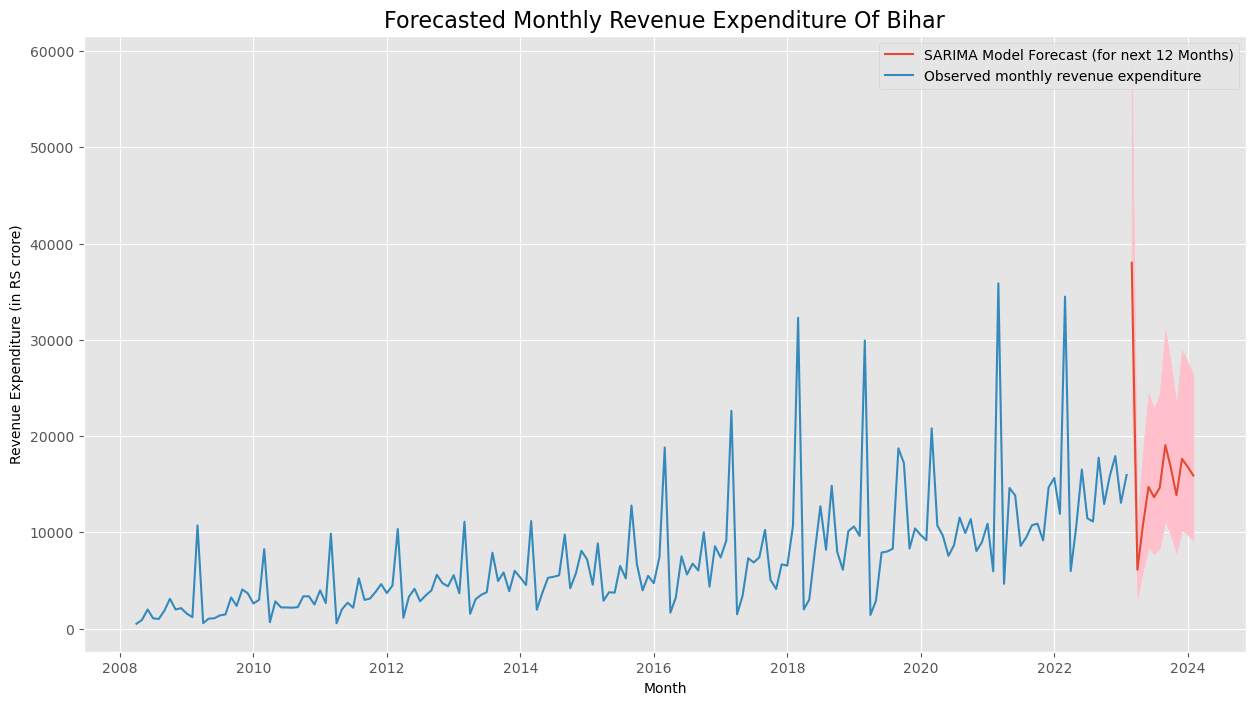

In [54]:
# Plotting Forecasted Mean and associated Confidence Interval
plt.plot(forecasted_mean.index, forecasted_mean, label='SARIMA Model Forecast (for next 12 Months)')
plt.fill_between(forecast_conf_int.index, forecast_conf_int_lower, 
                 forecast_conf_int_upper, color='pink')
plt.plot(dates, inv_boxcox(revenue_exp_Bihar,optimal_lambda), label='Observed monthly revenue expenditure')
plt.title('Forecasted Monthly Revenue Expenditure Of Bihar',fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Revenue Expenditure (in RS crore)')
plt.legend()
plt.show()

In [55]:
# Forecasted Results in a Dataframe
Forecasted_Result = pd.merge(forecasted_mean,forecast_conf_int_lower,left_index=True,right_index=True)
Forecasted_Result = pd.merge(Forecasted_Result,forecast_conf_int_upper,left_index=True,right_index=True).rename(
                                                                    {'predicted_mean':'Forecasted Value',
                                                                    'lower Bihar_BoxCox':'Lower Confidence Interval',
                                                                    'upper Bihar_BoxCox':'Upper Confidence Interval'},axis=1)

Forecasted_Result

,Forecasted Value,Lower Confidence Interval,Upper Confidence Interval
2023-03-01,38005.900821,23770.988504,58684.339127
2023-04-01,6105.034272,3182.278772,10971.760842
2023-05-01,10726.811567,5952.071023,18317.705970
2023-06-01,14714.921335,8431.302709,24467.902949
2023-07-01,13634.285665,7749.396676,22823.704387
2023-08-01,14618.438146,8364.011193,24336.553958
2023-09-01,19064.553823,11190.219661,31067.064282
2023-10-01,16702.376302,9675.720173,27519.173075
2023-11-01,13842.890949,7867.700684,23173.550304
2023-12-01,17626.490452,10256.995141,28932.856484


## Investigating Granger Causality Between Revenue Expenditure and Revenue Deficit/Surplus

> In this section we want to examin whether Bihar's Monthly Revenue Deficit/Surplus Granger causes Monthly Revenue Expenditure

In [56]:
# importing the dataset and setting Month as Index
revenue_exp_deficits = pd.read_excel("Bihar Revenue Expenditure and Deficits.xlsx",sheet_name='Revenue Expenditure & Deficits')
revenue_exp_deficits.set_index(keys=['Month'],inplace=True)
revenue_exp_deficits

,Revenue Expenditure,Revenue Surplus(+)/Deficit(-),Fiscal Surplus(+)/Deficit(-),Primary Deficit(-)/Surplus(+)
Month,,,,
2008-04-01,497,-197,-239,-239
2008-05-01,891,-429,-562,-562
2008-06-01,1975,-1456,-1827,-1539
2008-07-01,1060,2413,1675,1735
2008-08-01,990,-539,-795,-795
...,...,...,...,...
2022-10-01,12936,-9750,-10987,-11350
2022-11-01,15860,-12006,-17409,-16814
2022-12-01,17919,634,-951,599


In [57]:
# Checking for na values
revenue_exp_deficits.isna().sum()

Revenue Expenditure              0
Revenue Surplus(+)/Deficit(-)    0
Fiscal Surplus(+)/Deficit(-)     0
Primary Deficit(-)/Surplus(+)    0
dtype: int64

In [58]:
# Basic descriptive statistics of dataset
revenue_exp_deficits.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue Expenditure,179.0,7254.206704,6001.285736,497.0,3171.5,5613.0,9814.0,35868.0
Revenue Surplus(+)/Deficit(-),179.0,-305.743017,6173.111998,-20629.0,-2619.5,-915.0,1541.0,29329.0
Fiscal Surplus(+)/Deficit(-),179.0,-1765.837989,6101.122508,-17409.0,-4420.5,-1665.0,-149.0,27891.0
Primary Deficit(-)/Surplus(+),179.0,-1178.787709,6415.296986,-16814.0,-3877.5,-1381.0,549.5,33047.0


In [59]:
# isolating Revenue Expenditure and Revenue Deficits/Surplus
revenue_exp_rev_deficit = revenue_exp_deficits.iloc[:,[0,1]]
revenue_exp_rev_deficit

,Revenue Expenditure,Revenue Surplus(+)/Deficit(-)
Month,,
2008-04-01,497,-197
2008-05-01,891,-429
2008-06-01,1975,-1456
2008-07-01,1060,2413
2008-08-01,990,-539
...,...,...
2022-10-01,12936,-9750
2022-11-01,15860,-12006
2022-12-01,17919,634


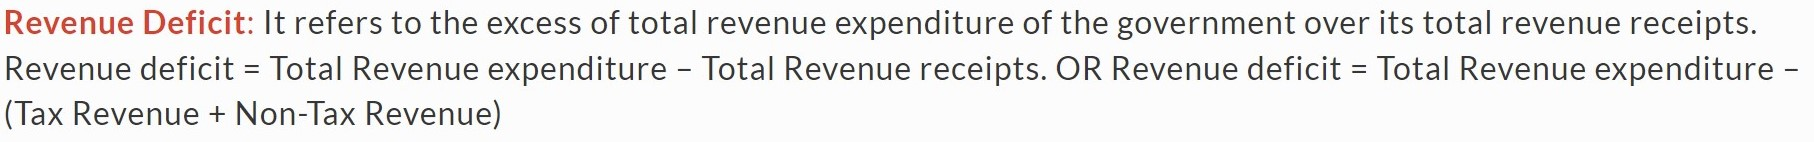

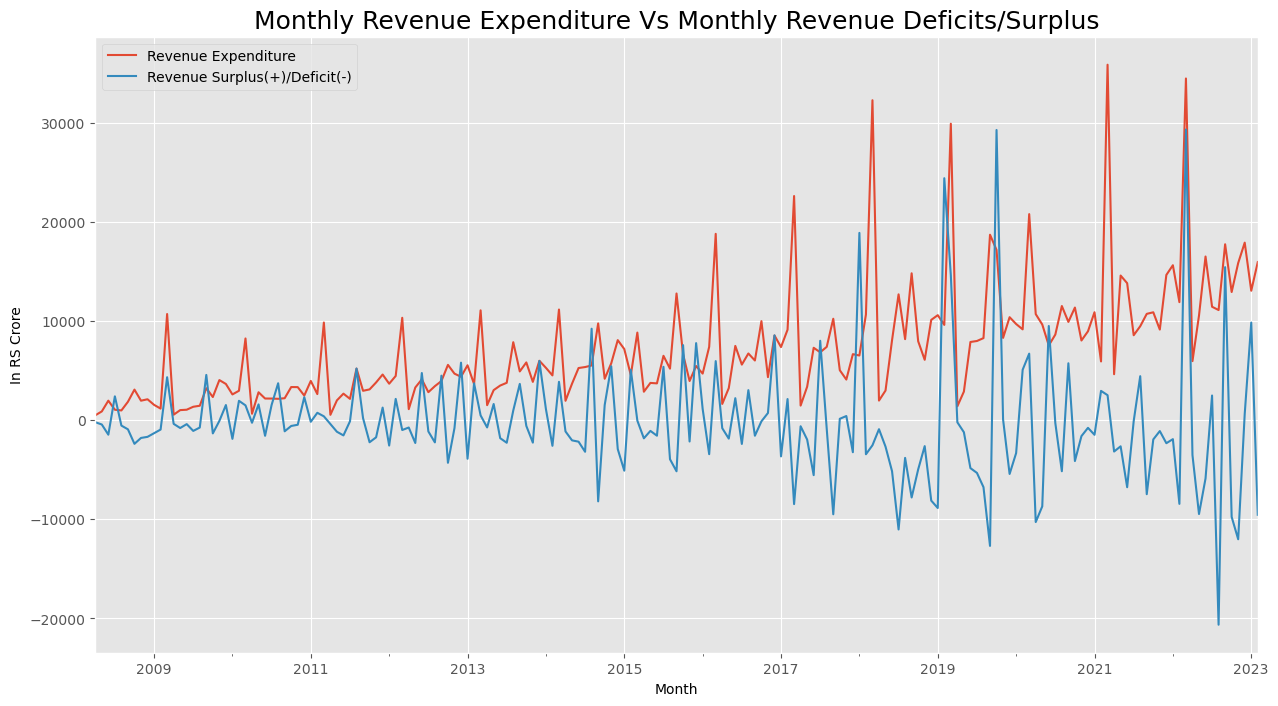

In [60]:
# plotting the graph
revenue_exp_rev_deficit.plot()
plt.title('Monthly Revenue Expenditure Vs Monthly Revenue Deficits/Surplus',fontsize=18)
plt.ylabel('In RS Crore')
plt.show()

In [61]:
# Importing Grangler Causalty test class from statsmodels
from statsmodels.tsa.stattools import grangercausalitytests

In [62]:
# Performing Granger Causality tests for upto 6 lags
causal_model  = grangercausalitytests(x=revenue_exp_rev_deficit,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8418  , p=0.1765  , df_denom=175, df_num=1
ssr based chi2 test:   chi2=1.8734  , p=0.1711  , df=1
likelihood ratio test: chi2=1.8636  , p=0.1722  , df=1
parameter F test:         F=1.8418  , p=0.1765  , df_denom=175, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8238  , p=0.1645  , df_denom=172, df_num=2
ssr based chi2 test:   chi2=3.7536  , p=0.1531  , df=2
likelihood ratio test: chi2=3.7144  , p=0.1561  , df=2
parameter F test:         F=1.8238  , p=0.1645  , df_denom=172, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1063  , p=0.1013  , df_denom=169, df_num=3
ssr based chi2 test:   chi2=6.5806  , p=0.0865  , df=3
likelihood ratio test: chi2=6.4605  , p=0.0912  , df=3
parameter F test:         F=2.1063  , p=0.1013  , df_denom=169, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4586  , p=0.0475  

> ### As it is shown in the above result, For Lag 4, test statistics are significant, which indicates Monthly Revenue Deficits/Surplus Granger Causes Monthly Revenue Expenditure in Bihar.